In [1]:
#import libraries
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette("hls", 20)

In [2]:
#import data
xls_file = pd.ExcelFile('C:\\Users\\sonja tilly.ABERDEEN\\data260917.xlsx')

**Prep data**

In [3]:
#parse sheet
data = xls_file.parse('data')
data.index = data['Date']
del data['Date']
data.shape

(7574, 59)

In [4]:
data.columns

Index(['FDTR Index', 'VIX Index', 'USTW$ Index', 'USGG10YR Index',
       'USGG30YR Index', 'USGG5YR Index', 'USYC2Y10 Index', 'USYC2Y30 Index',
       'USYC5Y10 Index', 'USYC2Y5Y Index', 'CPI YOY Index', 'FDIDFDMO Index',
       'USURTOT Index', 'NFP TCH Index', 'USEMNCHG Index', 'IP CHNG Index',
       'MTIBCHNG Index', 'MGT2TB Index', 'PIDSPINX Index', 'NAPMPMI Index',
       'OUTFGAF Index', 'USGGBE10 Index', 'USHBMIDX Index', 'CONCCONF Index',
       'OEUSKLAR Index', 'RSTAMOM Index', 'USTBTOT Index', 'FDDSGDP Index',
       'M2% YOY Index', 'CLA Comdty', 'CONSSENT Index', 'PIDSDPS Index',
       'CICRTOT Index', 'ARDIMOYY Index', 'M1% YOY Index', 'SCGRRAI Index',
       'EMB US Equity', 'SPE AUTO Index', 'SPE CARD Index', 'BFCIUS Index',
       'INJCJMOM Index', 'LEI CHNG Index', 'GDP CYOY Index', 'SLDETIGT Index',
       'SLDETGTS Index', 'GFSIFFND Index', 'XLF US Equity', 'XLE US Equity',
       'XLK US Equity', 'XLV US Equity', 'XLI US Equity', 'XLY US Equity',
       'XLB US 

In [5]:
#address data lags

def Shift(indicator, d):
    indicator.shift(d)
    return

data['CPI YOY Index'] = data['CPI YOY Index'].shift(11)
data['FDIDFDMO Index'] = data['FDIDFDMO Index'].shift(10)
data['USURTOT Index'] = data['NFP TCH Index'].shift(4)
data['NFP TCH Index'] = data['NFP TCH Index'].shift(4)
data['USEMNCHG Index'] = data['USEMNCHG Index'].shift(4)
data['IP CHNG Index'] = data['IP CHNG Index'].shift(17)
data['MTIBCHNG Index'] = data['MTIBCHNG Index'].shift(15)
data['MGT2TB Index'] = data['MGT2TB Index'].shift(15)
data['OUTFGAF Index'] = data['OUTFGAF Index'].shift(17)
data['USHBMIDX Index'] = data['USHBMIDX Index'].shift(15)
data['CONCCONF Index'] = data['CONCCONF Index'].shift(29)
data['RSTAMOM Index'] = data['RSTAMOM Index'].shift(15)
data['USTBTOT Index'] = data['USTBTOT Index'].shift(4)
data['CONSSENT Index'] = data['CONSSENT Index'].shift(18)
data['CICRTOT Index'] = data['CICRTOT Index'].shift(7)
data['SPE AUTO Index'] = data['SPE AUTO Index'].shift(30)
data['SPE CARD Index'] = data['SPE CARD Index'].shift(30)
data['GDP CYOY Index'] = data['GDP CYOY Index'].shift(30)

data = data.fillna(0)
data.shape

(7574, 59)

**Transform features**

In [6]:
#convert index to datetime object
data.index = pd.to_datetime(data.index)


In [7]:
# these are the transformations applied to each indicator
# the transformations of the n variables create n new columns of the transformed variable which then run through the classifiers
# add zscore formula to LevelChange and PctChange

from scipy import stats

window = [30,90,180]

def LevelChange (indicator, window): #calculate the monthly change in the indicator, window expressed in Months
    days=int(window)
    data[str(indicator)+' change in '+str(window)+'ds']=data[indicator]-data[indicator].shift(days)
    #data[str(indicator)+' change in '+str(window)+'ds' +'zscore']=stats.zscore(data[indicator], axis=None)
    
def PctChange (indicator,window): #calculate the monthly percentage change in the indicator, window expressed in Months
    days=int(window)
    data[str(indicator)+' %change in '+str(window)+'ds']=data[indicator]/data[indicator].shift(days)-1
    #data[str(indicator)+' change in '+str(window)+'ds' +'zscore']=stats.zscore(data[indicator], axis=None)
    
def Zscore (indicator,window):  # calculate a Z score over a number of trading days
    mean=data[indicator].rolling(window).mean()
    std=data[indicator].rolling(window).std()
    data[str(indicator)+str(window)+'zscore']=(data[indicator]-mean)/std
 

In [8]:
cols = list(data.columns)

for i in window:
    for col in cols:
        Zscore (col,i)


In [9]:
for i in window:
    LevelChange('FDTR Index', i)
    LevelChange('CPI YOY Index', i)
    LevelChange('IP CHNG Index', i)
    LevelChange('MGT2TB Index', i)
    LevelChange('NAPMPMI Index', i)
    LevelChange('OUTFGAF Index', i)
    LevelChange('USGGBE10 Index', i)
    LevelChange('USHBMIDX Index', i)
    LevelChange('CONCCONF Index', i)
    LevelChange('OEUSKLAR Index', i)
    LevelChange('FDDSGDP Index', i)
    LevelChange('M2% YOY Index', i)
    LevelChange('CONSSENT Index', i)
    LevelChange('PIDSDPS Index', i)
    LevelChange('CICRTOT Index', i)
    LevelChange('M1% YOY Index', i)
    LevelChange('SCGRRAI Index', i)
    LevelChange('LEI CHNG Index', i)
    LevelChange('GDP CYOY Index', i)
    LevelChange('GFSIFFND Index', i)
    LevelChange('CDX HY CDSI GEN 5Y SPRD Corp', i)
    LevelChange('PCUSEQTR Index', i)
    LevelChange('GFSIRLIQ Index', i)
    LevelChange('CIGMEMRA Index', i)
    LevelChange('CIGMGRAM Index', i)
    LevelChange('LF98OAS Index', i)

In [10]:
for i in window:
    PctChange('VIX Index',i)
    PctChange('USTW$ Index',i)
    PctChange('USGG10YR Index',i)
    PctChange('USGG30YR Index',i)
    PctChange('USGG5YR Index',i)
    PctChange('USYC2Y10 Index',i)
    PctChange('USYC2Y30 Index',i)
    PctChange('USYC5Y10 Index',i)
    PctChange('USYC2Y5Y Index',i)
    PctChange('FDIDFDMO Index',i)
    PctChange('USEMNCHG Index',i)
    PctChange('MTIBCHNG Index',i)
    PctChange('PIDSPINX Index',i)
    PctChange('RSTAMOM Index',i)
    PctChange('USTBTOT Index',i)
    PctChange('CLA Comdty',i)
    PctChange('ARDIMOYY Index',i)
    PctChange('EMB US Equity',i)
    PctChange('SPE AUTO Index',i)
    PctChange('SPE CARD Index',i)
    PctChange('BFCIUS Index',i)
    PctChange('INJCJMOM Index',i)
    PctChange('SLDETIGT Index',i)
    PctChange('SLDETGTS Index',i)
    PctChange('XLF US Equity',i)
    PctChange('XLE US Equity',i)
    PctChange('XLK US Equity',i)
    PctChange('XLV US Equity',i)
    PctChange('XLI US Equity',i)
    PctChange('XLY US Equity',i)
    PctChange('XLB US Equity',i)

In [11]:
data.head(2)

,FDTR Index,VIX Index,USTW$ Index,USGG10YR Index,USGG30YR Index,USGG5YR Index,USYC2Y10 Index,USYC2Y30 Index,USYC5Y10 Index,USYC2Y5Y Index,CPI YOY Index,FDIDFDMO Index,USURTOT Index,NFP TCH Index,USEMNCHG Index,IP CHNG Index,MTIBCHNG Index,MGT2TB Index,PIDSPINX Index,NAPMPMI Index,OUTFGAF Index,USGGBE10 Index,USHBMIDX Index,CONCCONF Index,OEUSKLAR Index,RSTAMOM Index,USTBTOT Index,FDDSGDP Index,M2% YOY Index,CLA Comdty,CONSSENT Index,PIDSDPS Index,CICRTOT Index,ARDIMOYY Index,M1% YOY Index,SCGRRAI Index,EMB US Equity,SPE AUTO Index,SPE CARD Index,BFCIUS Index,INJCJMOM Index,LEI CHNG Index,GDP CYOY Index,SLDETIGT Index,SLDETGTS Index,GFSIFFND Index,XLF US Equity,XLE US Equity,XLK US Equity,XLV US Equity,XLI US Equity,XLY US Equity,XLB US Equity,CDX HY CDSI GEN 5Y SPRD Corp,PCUSEQTR Index,GFSIRLIQ Index,CIGMEMRA Index,CIGMGRAM Index,LF98OAS Index,FDTR Index30zscore,VIX Index30zscore,USTW$ Index30zscore,USGG10YR Index30zscore,USGG30YR Index30zscore,USGG5YR Index30zscore,USYC2Y10 Index30zscore,USYC2Y30 Index30zscore,USYC5Y10 Index30zscore,USYC2Y5Y Index30zscore,CPI YOY Index30zscore,FDIDFDMO Index30zscore,USURTOT Index30zscore,NFP TCH Index30zscore,USEMNCHG Index30zscore,IP CHNG Index30zscore,MTIBCHNG Index30zscore,MGT2TB Index30zscore,PIDSPINX Index30zscore,NAPMPMI Index30zscore,OUTFGAF Index30zscore,USGGBE10 Index30zscore,USHBMIDX Index30zscore,CONCCONF Index30zscore,OEUSKLAR Index30zscore,RSTAMOM Index30zscore,USTBTOT Index30zscore,FDDSGDP Index30zscore,M2% YOY Index30zscore,CLA Comdty30zscore,CONSSENT Index30zscore,PIDSDPS Index30zscore,CICRTOT Index30zscore,ARDIMOYY Index30zscore,M1% YOY Index30zscore,SCGRRAI Index30zscore,EMB US Equity30zscore,SPE AUTO Index30zscore,SPE CARD Index30zscore,BFCIUS Index30zscore,INJCJMOM Index30zscore,LEI CHNG Index30zscore,GDP CYOY Index30zscore,SLDETIGT Index30zscore,SLDETGTS Index30zscore,GFSIFFND Index30zscore,XLF US Equity30zscore,XLE US Equity30zscore,XLK US Equity30zscore,XLV US Equity30zscore,XLI US Equity30zscore,XLY US Equity30zscore,XLB US Equity30zscore,CDX HY CDSI GEN 5Y SPRD Corp30zscore,PCUSEQTR Index30zscore,GFSIRLIQ Index30zscore,CIGMEMRA Index30zscore,CIGMGRAM Index30zscore,LF98OAS Index30zscore,FDTR Index90zscore,VIX Index90zscore,USTW$ Index90zscore,USGG10YR Index90zscore,USGG30YR Index90zscore,USGG5YR Index90zscore,USYC2Y10 Index90zscore,USYC2Y30 Index90zscore,USYC5Y10 Index90zscore,USYC2Y5Y Index90zscore,CPI YOY Index90zscore,FDIDFDMO Index90zscore,USURTOT Index90zscore,NFP TCH Index90zscore,USEMNCHG Index90zscore,IP CHNG Index90zscore,MTIBCHNG Index90zscore,MGT2TB Index90zscore,PIDSPINX Index90zscore,NAPMPMI Index90zscore,OUTFGAF Index90zscore,USGGBE10 Index90zscore,USHBMIDX Index90zscore,CONCCONF Index90zscore,OEUSKLAR Index90zscore,RSTAMOM Index90zscore,USTBTOT Index90zscore,FDDSGDP Index90zscore,M2% YOY Index90zscore,CLA Comdty90zscore,CONSSENT Index90zscore,PIDSDPS Index90zscore,CICRTOT Index90zscore,ARDIMOYY Index90zscore,M1% YOY Index90zscore,SCGRRAI Index90zscore,EMB US Equity90zscore,SPE AUTO Index90zscore,SPE CARD Index90zscore,BFCIUS Index90zscore,INJCJMOM Index90zscore,LEI CHNG Index90zscore,GDP CYOY Index90zscore,SLDETIGT Index90zscore,SLDETGTS Index90zscore,GFSIFFND Index90zscore,XLF US Equity90zscore,XLE US Equity90zscore,XLK US Equity90zscore,XLV US Equity90zscore,XLI US Equity90zscore,XLY US Equity90zscore,XLB US Equity90zscore,CDX HY CDSI GEN 5Y SPRD Corp90zscore,PCUSEQTR Index90zscore,GFSIRLIQ Index90zscore,CIGMEMRA Index90zscore,CIGMGRAM Index90zscore,LF98OAS Index90zscore,FDTR Index180zscore,VIX Index180zscore,USTW$ Index180zscore,USGG10YR Index180zscore,USGG30YR Index180zscore,USGG5YR Index180zscore,USYC2Y10 Index180zscore,USYC2Y30 Index180zscore,USYC5Y10 Index180zscore,USYC2Y5Y Index180zscore,CPI YOY Index180zscore,FDIDFDMO Index180zscore,USURTOT Index180zscore,NFP TCH Index180zscore,USEMNCHG Index180zscore,IP CHNG Index180zscore,MTIBCHNG Index180zscore,MGT2TB Index180zscore,PIDSPINX Index180zscore,NAPMPMI Index180zscore,OUTFGAF Index180zscore,USGGBE1

**Resample imbalanced classes**

In [12]:
# Transform target variable into binary classification

data['LF98OAS Index change in 30ds'] = [1 if i >= 0.5 else 0 for i in data['LF98OAS Index change in 30ds']]
 
data['LF98OAS Index change in 30ds'].value_counts()


0    6473
1    1101
Name: LF98OAS Index change in 30ds, dtype: int64

**Plot the classes**

([], <a list of 0 Text xticklabel objects>)

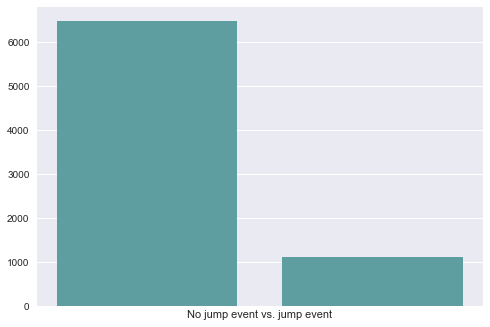

In [13]:
plt.hist(data['LF98OAS Index change in 30ds'], bins=range(0,3), rwidth=0.8, color='cadetblue')

plt.xlabel(('No jump event vs. jump event'))
plt.xticks([])

*This is an imbalanced dataset - resampling is required.*

**Define input and target variables**

In [14]:
y = data['LF98OAS Index change in 30ds'].fillna(0)

#LF98OAS Index
#LF98OAS Index90zscore
#LF98OAS Index180zscore
#LF98OAS Index360zscore
#LF98OAS Index change in 90dszscore
#LF98OAS Index change in 180dszscore
#LF98OAS Index change in 360dszscore

X = data.drop(['LF98OAS Index', 'LF98OAS Index change in 30ds','LF98OAS Index change in 90ds',\
          'LF98OAS Index change in 180ds', 'LF98OAS Index30zscore','LF98OAS Index90zscore',\
               'LF98OAS Index180zscore'], axis=1)


In [15]:
#check if X contains any column related to target variable

cols = list(X.columns)

for col in cols:
    if "LF98OAS" in col:
        print (col)

**Calculate class weights**

0    6473
1    1101
Name: LF98OAS Index change in 30ds, dtype: int64


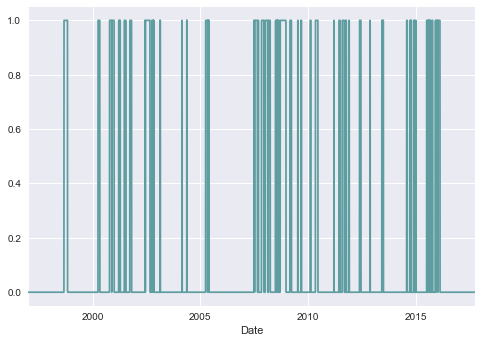

In [16]:
naive=data['LF98OAS Index change in 30ds'].value_counts()# naive prediction
print(naive)
data['LF98OAS Index change in 30ds'].plot(color='cadetblue')

In [17]:
def weight(cl):
    if cl==1:
        return naive[0].astype(float)/naive[1].astype(float)
    else:
        return 1

wgt = y.apply(weight)


In [18]:
wgt.value_counts()

1.000000    6473
5.879201    1101
Name: LF98OAS Index change in 30ds, dtype: int64

In [19]:
#address inf and nan values
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)


In [20]:
#split out training and testing sets

X_train = X[:6015]
y_train = y[:6015]
X_test = X[6015:]
y_test = y[6015:]
y_test.describe()

count    1559.000000
mean        0.108403
std         0.310988
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LF98OAS Index change in 30ds, dtype: float64

**Gradient Boosted Trees**

In [23]:
#try Gradient Boosted Trees

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score

# tuning the number of leaves
group = []
for i in np.linspace(10,20,num=11):
    i=int(i)
    params = {'n_estimators': 600, 'max_depth': 30, 'max_features': 3,
          'learning_rate': 0.01, 'max_leaf_nodes': i, 'random_state': 47}

    gbc = GradientBoostingClassifier(**params)

    gbc.fit(X_train, y_train,sample_weight=wgt[:6015])

    scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='average_precision')
    group.append((i, average_precision_score(y_test, gbc.predict(X_test)),
                  average_precision_score(y_train, gbc.predict(X_train)),
                  scores.mean(), scores.std()))
   

In [24]:
print(group)

[(10, 0.57959977884979119, 0.9048502915322465, 0.60388576250529213, 0.12584401073470119), (11, 0.56805269739000708, 0.91439698611415243, 0.59895291324968492, 0.12651343586606517), (12, 0.58825782867328236, 0.92063468401821069, 0.5917096236830317, 0.12284514700815471), (13, 0.5873277189086139, 0.93113527900503534, 0.57756078349744844, 0.12845628536614725), (14, 0.56830865526370133, 0.93520008487445749, 0.5806076295203475, 0.12827296408041858), (15, 0.58192229433039611, 0.94170616113744077, 0.56148758011573852, 0.12237023331408778), (16, 0.5825989523379369, 0.94714279867899309, 0.55910954717432226, 0.12542353403225867), (17, 0.57399310035859097, 0.95242718446601948, 0.55451560407383338, 0.13277363850977458), (18, 0.58305911346192496, 0.95641527913809998, 0.55987443456913044, 0.13854704141998561), (19, 0.57641907026108941, 0.96001974333662388, 0.54400919805748649, 0.13067602454748212), (20, 0.58987829719689955, 0.96460618145563304, 0.54865119455633216, 0.14179009732248135)]


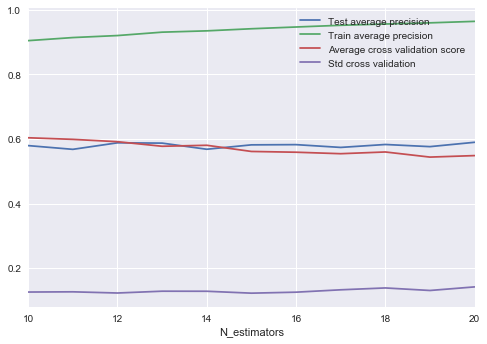

In [25]:
group_results = pd.DataFrame(data=group)
group_results.columns = ['N_estimators','Test average precision','Train average precision','Average cross validation score','Std cross validation']
group_results = group_results.set_index('N_estimators')

group_results.plot()

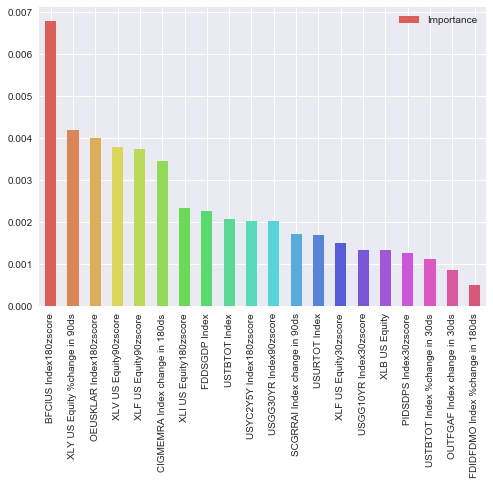

In [26]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, gbc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances[:20]
importances.sort_values(by='Importance', ascending=False).plot(kind='bar', rot=90, color=color)

In [32]:
average_precision = average_precision_score(y_test, gbc.predict(X_test))

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.59


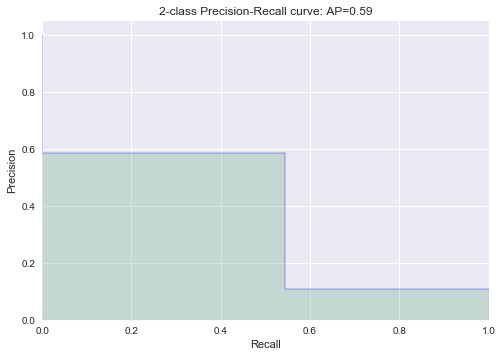

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, gbc.predict(X_test))

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='seagreen')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))


Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Precision (P) is defined as the number of true positives (T_p) over the number of true positives plus the number of false positives (F_p).

Precision P = TP/(TP+FP)

Recall (R) is defined as the number of true positives (T_p) over the number of true positives plus the number of false negatives (F_n).

Recall R = TP/(TP+FN)

These quantities are also related to the (F_1) score, which is defined as the harmonic mean of precision and recall.

F1 = 2x(PxR)/(P+R)

